# WeatherPy
----


* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

##### Observations using plots:
###### Northern Hemisphere - Max Temp vs. Latitude Linear Regression (r-square = 0.534)
By looking at the graph, one can predict that, there is a relationship between temperature and
 latitude. AS latitude increases the temperature falls. The R square value is 0.534, less than 1,
which indicate that regression model is not perfect but there is a moderate kind of relationship between Max Temp and Latitude 
###### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (r-square = 0.0012)
By looking at the graph, one can predict that, there is no a relationship between Humidity and  
 latitude. The R square value is 0.0012. This indicate that regression model is not perfect and no correlation between Humidity and Latitude.
###### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (r-square=0.0014)
 By looking at the graph, one can predict that, there is no a relationship between Wind Speed and  
 latitude. The R square value is 0.0014. This indicate that regression model is not perfect and no correlation between Wind Speed and Latitude.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from config import api_key

# Import API key
#from api_keys import weather_api_key
#from api_keys import api_keys
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat=[]
lng = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat.append(lat_lng[0])
        lng.append(lat_lng[1])

# Print the city count to confirm sufficient count
len(cities)
#cities[1]

626

In [3]:
citipy_pd = pd.DataFrame({"city_citipy":cities,
                           "Latitude":lat,
                            "Longitude":lng})
citipy_pd

,city_citipy,Latitude,Longitude
0,illoqqortoormiut,85.545741,-24.101015
1,oranjemund,-28.507081,16.681573
2,nizwa,22.477122,57.480381
3,saint-philippe,-28.147264,58.797828
4,baykit,63.848802,95.085977
...,...,...,...
599,key west,24.428483,-82.756071
600,north bend,43.921682,-124.427958
601,saiha,22.129647,92.816632
602,strzelce krajenskie,52.795324,15.428807


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create a query string
units="imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&units={units}&q="
query_url


'http://api.openweathermap.org/data/2.5/weather?appid=7b3b38d80098c8595e45a03cd5e72ddb&units=imperial&q='

In [4]:
# For testing just check data for one city = Paris
(requests.get(query_url + "Paris")).json()

{'coord': {'lon': 2.3488, 'lat': 48.8534},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 79.2,
  'feels_like': 79.2,
  'temp_min': 77.27,
  'temp_max': 81.18,
  'pressure': 1015,
  'humidity': 59},
 'visibility': 10000,
 'wind': {'speed': 1.01, 'deg': 225, 'gust': 5.99},
 'clouds': {'all': 75},
 'dt': 1629552886,
 'sys': {'type': 2,
  'id': 2041230,
  'country': 'FR',
  'sunrise': 1629521521,
  'sunset': 1629572149},
 'timezone': 7200,
 'id': 2988507,
 'name': 'Paris',
 'cod': 200}

In [5]:
# get all the data all cities from penweathermap using Api
#tore failed cities in a seperate list. List name = Failed_city
lat = []
lng=[]
MaxTemp =[]
Humidity=[]
Cloudiness=[]
WindSpeed=[]
Country=[]
Date = []
city_n =[]
Temp =[]
Record = 1
# List of failed cities
Failed_city =[]
#Count of failed cities
Failed_count = 0

#"suao"
# Loop all the cities in cities 
print('-----------------------')
print('Beginning Data Retrieval')
print('-----------------------')
#ity_names = ["butaritari","yerbogachen","cape town","touba", "London", "Oslo","Beijing","Flinders","karachi","suao"]
#Actual city list is from CityPy
for city in cities:
#or city in city_names:
    try:
            weather_info = (requests.get(query_url + city)).json()
            city_n.append(weather_info['name'])
            lat.append(weather_info['coord']['lat'])
            lng.append(weather_info['coord']['lon'])
            MaxTemp.append(weather_info["main"]["temp_max"])
            Humidity.append(weather_info["main"]["humidity"])
            Cloudiness.append(weather_info["clouds"]["all"])
            WindSpeed.append(weather_info["wind"]["speed"])
            Country.append(weather_info["sys"]['country'])
            Temp.append(weather_info["main"]["temp"])
            Date.append(weather_info["dt"])
            #MaxTemp.append(weather_info["main"]["temp_max"])
            #To count the number of cities for loop print and print city name
        
            print(f'Processing Record{Record} of set 1| {city}')
            Record = Record +1
            time.sleep(1.00)
    except: 
        Failed_city.append(city)
        print(f'Processing Record{Record} of set 1, exception occured, Failed city name| {city}')
        Failed_count = Failed_count + 1
    
    


-----------------------
Beginning Data Retrieval
-----------------------
Processing Record1 of set 1| marsa matruh
Processing Record2 of set 1| rikitea
Processing Record3 of set 1| roald
Processing Record4 of set 1| ushuaia
Processing Record5 of set 1| port elizabeth
Processing Record6 of set 1| victoria
Processing Record7 of set 1| abu dhabi
Processing Record8 of set 1| tiksi
Processing Record9 of set 1| bend
Processing Record10 of set 1| severo-kurilsk
Processing Record11 of set 1| saint george
Processing Record12 of set 1| sarkand
Processing Record13 of set 1, exception occured, Failed city name| burica
Processing Record13 of set 1| barcelona
Processing Record14 of set 1| ternuvate
Processing Record15 of set 1| chuy
Processing Record16 of set 1| poros
Processing Record17 of set 1| puerto escondido
Processing Record18 of set 1| inta
Processing Record19 of set 1| hofn
Processing Record20 of set 1| rawson
Processing Record21 of set 1| nekhayevskiy
Processing Record22 of set 1| labytnan

Processing Record177 of set 1| amahai
Processing Record178 of set 1| portobelo
Processing Record179 of set 1| yar-sale
Processing Record180 of set 1| sambava
Processing Record181 of set 1| hami
Processing Record182 of set 1| ponta do sol
Processing Record183 of set 1| gari
Processing Record184 of set 1| ahipara
Processing Record185 of set 1| yellowknife
Processing Record186 of set 1| el alto
Processing Record187 of set 1| erzin
Processing Record188 of set 1| port hardy
Processing Record189 of set 1| ishigaki
Processing Record190 of set 1, exception occured, Failed city name| bargal
Processing Record190 of set 1| ilebo
Processing Record191 of set 1| tasiilaq
Processing Record192 of set 1| cabo san lucas
Processing Record193 of set 1| provideniya
Processing Record194 of set 1| sept-iles
Processing Record195 of set 1| mount isa
Processing Record196 of set 1| ilhabela
Processing Record197 of set 1, exception occured, Failed city name| mullaitivu
Processing Record197 of set 1| nikolskoye
Pr

Processing Record357 of set 1| velsk
Processing Record358 of set 1| cap-aux-meules
Processing Record359 of set 1| altay
Processing Record360 of set 1| beringovskiy
Processing Record361 of set 1| talakan
Processing Record362 of set 1, exception occured, Failed city name| saleaula
Processing Record362 of set 1| kovur
Processing Record363 of set 1| fare
Processing Record364 of set 1| amiens
Processing Record365 of set 1| homer
Processing Record366 of set 1| bonthe
Processing Record367 of set 1| doha
Processing Record368 of set 1| casper
Processing Record369 of set 1| isangel
Processing Record370 of set 1| alta floresta
Processing Record371 of set 1| quatre cocos
Processing Record372 of set 1| tanete
Processing Record373 of set 1| norman wells
Processing Record374 of set 1| atar
Processing Record375 of set 1| corrales
Processing Record376 of set 1| south lake tahoe
Processing Record377 of set 1| grand gaube
Processing Record378 of set 1| loikaw
Processing Record379 of set 1| erenhot
Proces

Processing Record536 of set 1| birjand
Processing Record537 of set 1| dakar
Processing Record538 of set 1| biltine
Processing Record539 of set 1| camalu
Processing Record540 of set 1| imbituba
Processing Record541 of set 1| ilulissat
Processing Record542 of set 1| bogorodskoye
Processing Record543 of set 1| longyearbyen
Processing Record544 of set 1| mwene-ditu
Processing Record545 of set 1| rodrigues alves
Processing Record546 of set 1| bulri
Processing Record547 of set 1| dauphin
Processing Record548 of set 1| mirebalais
Processing Record549 of set 1| xining
Processing Record550 of set 1| steamboat springs
Processing Record551 of set 1, exception occured, Failed city name| mocambique
Processing Record551 of set 1| palencia
Processing Record552 of set 1| porto santo
Processing Record553 of set 1| cayenne
Processing Record554 of set 1| kintampo
Processing Record555 of set 1| nenjiang
Processing Record556 of set 1| tagusao
Processing Record557 of set 1| urucara
Processing Record558 of s

In [6]:
# List failed cities
Failed_city
#Count of failed cities
Failed_count

47

In [9]:
#create an empty data Frame
weather_data_pd = pd.DataFrame()
# Write lists to a dataFrame -- weather_data_pd
weather_data_pd["City"] = city_n
weather_data_pd["Lat"] = lat
weather_data_pd["Lng"] = lng
weather_data_pd["Max Temp"] = MaxTemp
weather_data_pd["Humidity %"] = Humidity
weather_data_pd["Cloudiness"] = Cloudiness
weather_data_pd["Wind Speed"] = WindSpeed
weather_data_pd["Country"] =Country
weather_data_pd["Date"] =Date
weather_data_pd["Temperature"] =Temp
weather_data_pd

,City,Lat,Lng,Max Temp,Humidity %,Cloudiness,Wind Speed,Country,Date,Temperature
0,Marsá Maţrūḩ,31.3525,27.2453,86.20,66,0,13.80,EG,1629552930,86.20
1,Rikitea,-23.1203,-134.9692,68.50,52,75,17.67,PF,1629552932,68.50
2,Roald,62.5833,6.1333,62.17,67,20,11.50,NO,1629552933,58.35
3,Ushuaia,-54.8000,-68.3000,31.66,69,20,1.14,AR,1629552934,31.66
4,Port Elizabeth,-33.9180,25.5701,64.69,63,40,19.57,ZA,1629552936,64.69
...,...,...,...,...,...,...,...,...,...,...
574,Kango,0.1943,10.0951,82.26,64,99,2.39,GA,1629553689,82.26
575,Sioux Lookout,50.1001,-91.9170,66.27,82,75,12.66,CA,1629553691,66.27
576,Rudnogorsk,57.2639,103.7519,60.40,54,89,4.63,RU,1629553692,60.40
577,Phalombe,-15.8064,35.6507,81.52,33,84,1.05,MW,1629553693,81.52


In [ ]:
# Save the data
#weather_data_pd.to_csv("weather_city_data.csv", index=False, header=True)

In [10]:
# Collect the stats on weather data
weather_data_stats = weather_data_pd.describe()
weather_data_stats

,Lat,Lng,Max Temp,Humidity %,Cloudiness,Wind Speed,Date,Temperature
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02,579.000000
mean,20.897297,17.928441,71.342919,68.319516,56.858377,7.984076,1.629553e+09,70.605872
std,33.058600,87.714365,15.730564,22.810407,39.877763,5.270460,2.300947e+02,15.634373
min,-54.800000,-179.166700,30.310000,6.000000,0.000000,0.000000,1.629553e+09,30.310000
25%,-5.731300,-57.658750,59.020000,57.000000,12.000000,3.900000,1.629553e+09,58.350000
50%,24.866700,22.347900,74.840000,74.000000,75.000000,6.910000,1.629553e+09,74.010000
75%,48.715500,92.416650,82.410000,86.000000,98.000000,11.015000,1.629553e+09,82.050000
max,78.218600,179.316700,109.710000,100.000000,100.000000,35.680000,1.629554e+09,109.420000


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Save the data
weather_data_pd.to_csv("output_data/weather_city_data.csv", index=False, header=True)
weather_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity %,Cloudiness,Wind Speed,Country,Date,Temperature
0,Marsá Maţrūḩ,31.3525,27.2453,86.20,66,0,13.80,EG,1629552930,86.20
1,Rikitea,-23.1203,-134.9692,68.50,52,75,17.67,PF,1629552932,68.50
2,Roald,62.5833,6.1333,62.17,67,20,11.50,NO,1629552933,58.35
3,Ushuaia,-54.8000,-68.3000,31.66,69,20,1.14,AR,1629552934,31.66
4,Port Elizabeth,-33.9180,25.5701,64.69,63,40,19.57,ZA,1629552936,64.69


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# There is no city where humidity > 100%
weather_data_pd["Humidity %"]>100

0      False
1      False
2      False
3      False
4      False
       ...  
574    False
575    False
576    False
577    False
578    False
Name: Humidity %, Length: 579, dtype: bool

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

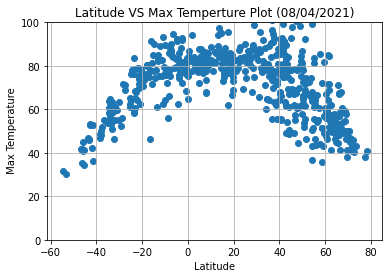

In [13]:
x_axis=weather_data_pd["Lat"]
y_axis = weather_data_pd["Max Temp"]
plt.scatter(x_axis,y_axis )
plt.title("Latitude VS Max Temperture Plot (08/04/2021)")
plt.ylabel(" Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(0,100)
plt.savefig("output_data/Latitude VS Max Temperture Plot.png")

## Latitude vs. Humidity Plot

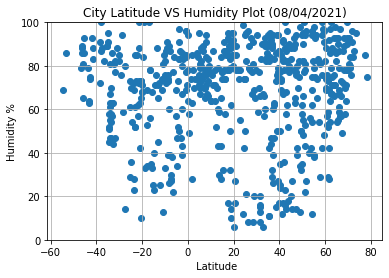

In [14]:
x_axis=weather_data_pd["Lat"]
y_axis = weather_data_pd["Humidity %"]
plt.scatter(x_axis,y_axis )
plt.title("City Latitude VS Humidity Plot (08/04/2021)")
plt.ylabel("Humidity %")
plt.xlabel(" Latitude")
plt.grid(True)
plt.ylim(0,100)
plt.savefig("output_data/Latitude VS Humidity Plot")

## Latitude vs. Cloudiness Plot

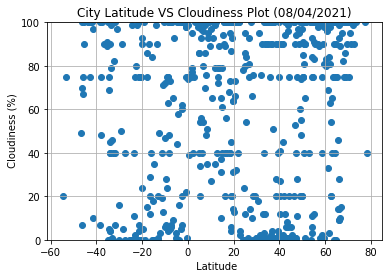

In [16]:
x_axis=weather_data_pd["Lat"]
y_axis = weather_data_pd["Cloudiness"] 
plt.scatter(x_axis,y_axis )
plt.ylim(0,100)
plt.title("City Latitude VS Cloudiness Plot (08/04/2021)")
plt.ylabel(" Cloudiness (%)")
plt.xlabel(" Latitude")
plt.grid(True)
plt.savefig("output_data/Latitude VS Cloudiness Plot")


## Latitude vs. Wind Speed Plot

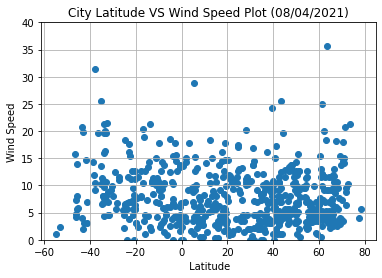

In [17]:
x_axis=weather_data_pd["Lat"]
y_axis=weather_data_pd["Wind Speed"]
plt.scatter(x_axis,y_axis )
plt.title("City Latitude VS Wind Speed Plot (08/04/2021)")
plt.ylabel("Wind Speed")
plt.xlabel(" Latitude")
plt.grid(True)
plt.ylim(0,40)
plt.savefig("output_data/Latitude VS Wind Speed Plot")

## Linear Regression

In [18]:
#Calculate x_values for Northern_Hemisphere

Northern_Hemisphere_lat =weather_data_pd.query('Lat>0')

Northern_Hemisphere_lat

,City,Lat,Lng,Max Temp,Humidity %,Cloudiness,Wind Speed,Country,Date,Temperature
0,Marsá Maţrūḩ,31.3525,27.2453,86.20,66,0,13.80,EG,1629552930,86.20
2,Roald,62.5833,6.1333,62.17,67,20,11.50,NO,1629552933,58.35
5,Hong Kong,22.2855,114.1577,87.33,78,100,9.37,HK,1629552860,86.76
6,Abu Dhabi,24.4667,54.3667,104.11,42,0,12.66,AE,1629552648,102.22
7,Tiksi,71.6872,128.8694,41.00,96,100,8.81,RU,1629552939,41.00
...,...,...,...,...,...,...,...,...,...,...
573,Nemuro,43.3236,145.5750,54.07,96,100,7.96,JP,1629553688,54.07
574,Kango,0.1943,10.0951,82.26,64,99,2.39,GA,1629553689,82.26
575,Sioux Lookout,50.1001,-91.9170,66.27,82,75,12.66,CA,1629553691,66.27
576,Rudnogorsk,57.2639,103.7519,60.40,54,89,4.63,RU,1629553692,60.40


In [19]:
#Calculate x_values for Southern Hemisphere
#Filter data using query
Southern_Hemisphere_lat =weather_data_pd.query('Lat<=0')
Southern_Hemisphere_lat

,City,Lat,Lng,Max Temp,Humidity %,Cloudiness,Wind Speed,Country,Date,Temperature
1,Rikitea,-23.1203,-134.9692,68.50,52,75,17.67,PF,1629552932,68.50
3,Ushuaia,-54.8000,-68.3000,31.66,69,20,1.14,AR,1629552934,31.66
4,Port Elizabeth,-33.9180,25.5701,64.69,63,40,19.57,ZA,1629552936,64.69
14,Chui,-33.6971,-53.4616,58.82,54,79,7.67,UY,1629552948,58.82
19,Rawson,-43.3002,-65.1023,45.88,64,100,20.78,AR,1629552955,45.88
...,...,...,...,...,...,...,...,...,...,...
544,Rodrigues Alves,-7.7380,-72.6509,88.00,39,5,3.58,BR,1629553649,88.00
556,Urucará,-2.5364,-57.7600,91.92,43,7,4.45,BR,1629553666,91.92
568,Sorong,-0.8833,131.2500,78.40,84,100,4.52,ID,1629553681,78.40
570,Manokwari,-0.8667,134.0833,79.00,77,22,2.93,ID,1629553684,79.00


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

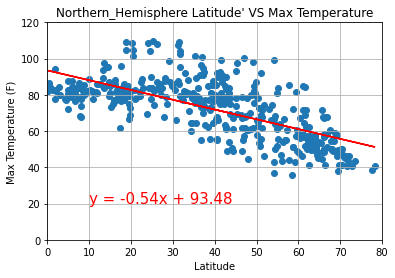

The r-squared value is: 0.45829368289193034


<Figure size 432x288 with 0 Axes>

In [20]:
x_values= Northern_Hemisphere_lat["Lat"]
y_values= Northern_Hemisphere_lat["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.title("Northern_Hemisphere Latitude' VS Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.xlim(0,80)
plt.ylim(0,120)
plt.grid(True)
plt.show()
print(f"The r-squared value is: {rvalue**2}")

plt.savefig("output_data/Northern_Hemisphere Latitude' VS Max Temperature")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

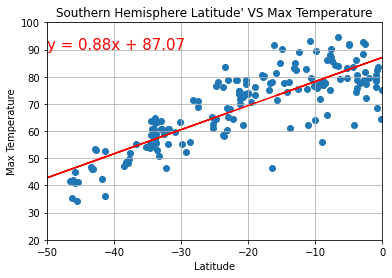

The r-squared value is: 0.7055059037490132


'y = 0.88x + 87.07'

In [21]:
x_values= Southern_Hemisphere_lat["Lat"]
y_values= Southern_Hemisphere_lat["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.title("Southern Hemisphere Latitude' VS Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.xlim(-50,-0)
plt.ylim(20,100)
plt.grid(True)
plt.show()
print(f"The r-squared value is: {rvalue**2}")
line_eq


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

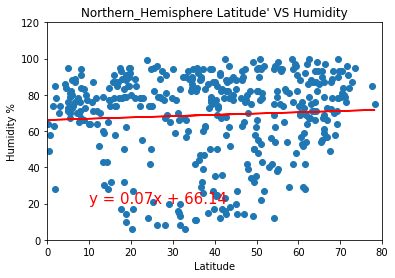

The r-squared value is: 0.0036837011849211016


'y = 0.07x + 66.14'

In [22]:
x_values= Northern_Hemisphere_lat["Lat"]
y_values= Northern_Hemisphere_lat["Humidity %"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.title("Northern_Hemisphere Latitude' VS Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.xlim(0,80)
plt.ylim(0,120)
plt.show()
print(f"The r-squared value is: {rvalue**2}")
line_eq


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

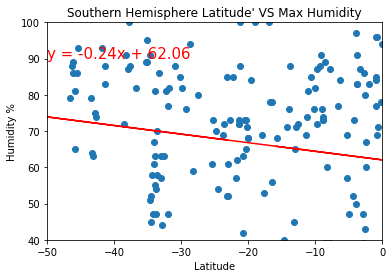

The r-squared value is: 0.024153237941934073


'y = -0.24x + 62.06'

In [23]:
x_values= Southern_Hemisphere_lat["Lat"]
y_values= Southern_Hemisphere_lat["Humidity %"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.title("Southern Hemisphere Latitude' VS Max Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.xlim(-50,0)
plt.ylim(40,100)
plt.show()
print(f"The r-squared value is: {rvalue**2}")
line_eq


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

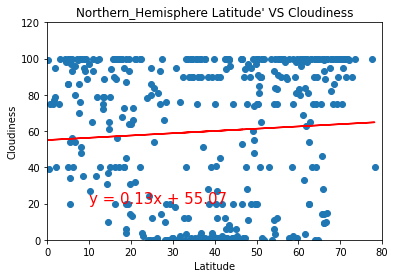

The r-squared value is: 0.004081595537638473


'y = 0.13x + 55.07'

In [24]:
x_values= Northern_Hemisphere_lat["Lat"]
y_values= Northern_Hemisphere_lat["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.title("Northern_Hemisphere Latitude' VS Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.xlim(0,80)
plt.ylim(0,120)
plt.show()
print(f"The r-squared value is: {rvalue**2}")
line_eq

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

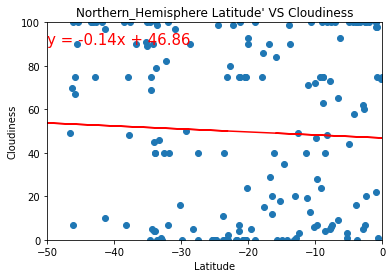

The r-squared value is: 0.0022481579696082207


'y = -0.14x + 46.86'

In [25]:
x_values= Southern_Hemisphere_lat["Lat"]
y_values= Southern_Hemisphere_lat["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.title("Northern_Hemisphere Latitude' VS Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.xlim(-50,0)
plt.ylim(0,100)
plt.show()
print(f"The r-squared value is: {rvalue**2}")
line_eq

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

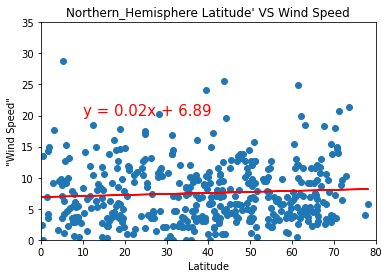

The r-squared value is: 0.00432385703051498


'y = 0.02x + 6.89'

In [26]:
x_values= Northern_Hemisphere_lat["Lat"]
y_values= Northern_Hemisphere_lat["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.title("Northern_Hemisphere Latitude' VS Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('"Wind Speed"')
plt.xlim(0,80)
plt.ylim(0,35)
plt.show()
print(f"The r-squared value is: {rvalue**2}")
line_eq

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

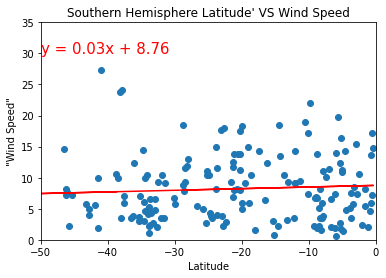

The r-squared value is: 0.004656420055801576


'y = 0.03x + 8.76'

In [51]:
x_values= Southern_Hemisphere_lat["Lat"]
y_values= Southern_Hemisphere_lat["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.title("Southern Hemisphere Latitude' VS Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('"Wind Speed"')
plt.xlim(-50,0)
plt.ylim(0,35)
plt.show()
print(f"The r-squared value is: {rvalue**2}")
line_eq